In [1]:
# p184 クイズ 4.1.1
[[0 for j in range(0, 4)] for i in range(0, 3)]

[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]

In [2]:
# p184 クイズ 4.1.2
[[j - i for j in range(3)] for i in range(4)]

[[0, 1, 2], [-1, 0, 1], [-2, -1, 0], [-3, -2, -1]]

In [3]:
# p186 クイズ 4.1.4
from vec import Vec
Vec({'a', 'b'}, {'a': 3, 'b': 30})

Vec({'a', 'b'},{'a': 3, 'b': 30})

In [4]:
# p186 クイズ 4.1.5
{'@': Vec({'a', 'b'}, {'a': 1, 'b': 10}),
 '#': Vec({'a', 'b'}, {'a': 2, 'b': 20}),
 '?': Vec({'a', 'b'}, {'a': 3, 'b': 30})}

{'@': Vec({'a', 'b'},{'a': 1, 'b': 10}),
 '#': Vec({'a', 'b'},{'a': 2, 'b': 20}),
 '?': Vec({'a', 'b'},{'a': 3, 'b': 30})}

In [5]:
class Mat:
    def __init__(self, labels, function):
        self.D = labels
        self.f = function

    def __repr__(self):
        "evaluatable representation"
        return "Mat(" + str(self.D) +", " + str(self.f) + ")"

In [6]:
# p188 クイズ 4.1.7
Mat(({'a', 'b', 'c'}, {'a', 'b', 'c'}), {('a', 'a'): 1, ('b', 'b'): 1, ('c', 'c'): 1})

Mat(({'a', 'c', 'b'}, {'a', 'c', 'b'}), {('a', 'a'): 1, ('b', 'b'): 1, ('c', 'c'): 1})

In [7]:
# p188 クイズ 4.1.8
def identity(D):
    return Mat((D, D), {(k, k): 1 for k in D})

identity({'x', 'y', 'z'})

Mat(({'z', 'y', 'x'}, {'z', 'y', 'x'}), {('z', 'z'): 1, ('y', 'y'): 1, ('x', 'x'): 1})

In [8]:
# p188 クイズ 4.1.9
def mat2rowdict(M):
    return {r: Vec(M.D[1], {c: M.f[r, c] for c in M.D[1]}) for r in M.D[0]}

In [9]:
m = Mat(({'a', 'b'}, {'@', '#', '?'}), {
    ('a', '@'): 1,  ('a', '#'): 2,  ('a', '?'): 3,
    ('b', '@'): 10, ('b', '#'): 20, ('b', '?'): 30,
})
mat2rowdict(m)

{'a': Vec({'?', '@', '#'},{'?': 3, '@': 1, '#': 2}),
 'b': Vec({'?', '@', '#'},{'?': 30, '@': 10, '#': 20})}

In [10]:
# p189 クイズ 4.1.10
def mat2coldict(M):
    return {c: Vec(M.D[0], {r: M.f[r, c] for r in M.D[0]}) for c in M.D[1]}

mat2coldict(m)

{'?': Vec({'a', 'b'},{'a': 3, 'b': 30}),
 '@': Vec({'a', 'b'},{'a': 1, 'b': 10}),
 '#': Vec({'a', 'b'},{'a': 2, 'b': 20})}

In [11]:
# p190 クイズ 4.3.1
def mat2vec(M):
    D = {(r, c) for r in M.D[0] for c in M.D[1]}
    return Vec(D, M.f.copy())

print(mat2vec(m))


 ('a', '#') ('a', '?') ('a', '@') ('b', '#') ('b', '?') ('b', '@')
------------------------------------------------------------------
          2          3          1         20         30         10


In [12]:
# p194 例 4.5.10
D = {'metal', 'concrete', 'plastic', 'water', 'electricity'}
v_gnome = Vec(D, {'concrete': 1.3, 'plastic': 0.2, 'water': 0.8, 'electricity': 0.4})
v_hoop = Vec(D, {'plastic': 1.5, 'water': 0.4, 'electricity': 0.3})
v_slinky = Vec(D, {'metal': 0.25, 'water': 0.2, 'electricity': 0.7})
v_putty = Vec(D, {'plastic': 0.3, 'water': 0.7, 'electricity': 0.5})
v_shooter = Vec(D, {'metal': 0.15, 'plastic': 0.5, 'water': 0.4, 'electricity': 0.8})

print(240*v_gnome + 55*v_hoop + 150*v_slinky + 133*v_putty + 90*v_shooter)


 concrete electricity metal plastic water
-----------------------------------------
      312         356    51     215   373


In [13]:
from mat import Mat
from matutil import *
rowdict = {'gnome': v_gnome, 'hoop': v_hoop, 'slinky': v_slinky, 'putty': v_putty, 'shooter': v_shooter}
M = rowdict2mat(rowdict)
print(M)


             concrete electricity metal plastic water
           ------------------------------------------
   gnome  |       1.3         0.4     0     0.2   0.8
    hoop  |         0         0.3     0     1.5   0.4
   putty  |         0         0.5     0     0.3   0.7
 shooter  |         0         0.8  0.15     0.5   0.4
  slinky  |         0         0.7  0.25       0   0.2



In [14]:
R = {'gnome', 'hoop', 'slinky', 'putty', 'shooter'}
u = Vec(R, {'gnome': 240, 'hoop': 55, 'slinky': 150, 'putty': 133, 'shooter': 90})
print(u*M)


 concrete electricity metal plastic water
-----------------------------------------
      312         356    51     215   373


In [15]:
# p197 例 4.5.15
from solver import *
C = {'metal', 'concrete', 'plastic', 'water', 'electricity'}
b = Vec(C, {'metal': 51.0, 'concrete': 312.0, 'plastic': 215.4, 'water': 373.1, 'electricity': 356.0})

solution = solve(M.transpose(), b)
print(solution)


 gnome hoop putty shooter slinky
--------------------------------
   240   55   133      90    150


In [16]:
residual = b - solution*M
print(residual)


 concrete electricity     metal  plastic    water
-------------------------------------------------
 5.68E-14    2.27E-13 -4.55E-13 2.84E-14 5.68E-14


In [17]:
residual * residual

2.65764083525338e-25

In [18]:
# p195 例 4.5.12
from GF2 import one
def button_vectors(n):
    D = {(i, j) for i in range(n) for j in range(n)}
    vecdict = {(i, j):
              Vec(D, dict([((x, j), one) for x in range(max(i-1, 0), min(i+2, n))]
                         +[((i, y), one) for y in range(max(j-1, 0), min(j+2, n))]))
                         for (i, j) in D}
    return vecdict

B = coldict2mat(button_vectors(5))

# ボタン (1,3) のベクトルを確認
import sys
for x in range(5):
    for y in range(5):
        if B[(1, 3), (x, y)] == one:
            sys.stdout.write('#')
        else:
            sys.stdout.write('.')
    print()

...#.
..###
...#.
.....
.....


In [19]:
# p198 例 4.5.16
s = Vec(B.D[0], {(2, 2): one})
sol = solve(B, s)

# 押すボタンの位置を確認
for x in range(5):
    for y in range(5):
        if sol[x, y] == one:
            sys.stdout.write('#')
        else:
            sys.stdout.write('.')
    print()

.##.#
#...#
#.##.
..#..
##...


In [20]:
B*sol == s

True

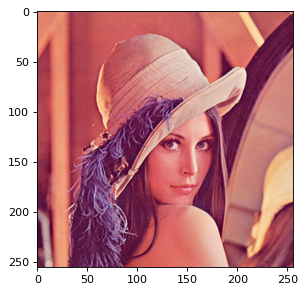

In [21]:
# p199 例 4.6.4 をNumpyでやってみる

%matplotlib inline
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# 元画像の読み込み＆表示（256px*256px）
im_org = np.array(Image.open('image/Lenna.bmp', 'r'))
dpi = 80
xpixels, ypixels = 256, 256

figsize = ypixels / dpi, xpixels / dpi

fig = plt.figure(figsize=figsize, dpi=dpi)
ax = fig.add_axes([0, 0, 1, 1])

ax.imshow(im_org)
plt.show()

In [22]:
# 画像をベクトル（1次元配列）として扱う
vec_org = im_org.reshape([256*256, 3])
vec_org

array([[226, 137, 125],
       [223, 137, 133],
       [226, 138, 120],
       ...,
       [162,  68,  80],
       [177,  66,  77],
       [181,  71,  81]], dtype=uint8)

In [23]:
# ダウンサンプリングの行列を作成する（64px*64pxに縮小する）
mat_ds = np.zeros((64**2, 256**2))
for j in range(64):
    for i in range(64):
        for m in range(4):
            for n in range(4):
                mat_ds[j*64 + i, (j*4+m)*256 + i*4+n] = 1/16

# 元画像ベクトルの左から作成した行列を掛ける
# ・要素レベルではRGB画素（int[3]）と重み（float）の乗算になるが、NumPyがベクトルのスカラ倍として計算してくれる
# ・vec_org が列ベクトルじゃないけど計算できているのもNumPyの賢さ（np.matrix だと厳密にやる必要がある？）
vec_small = mat_ds.dot(vec_org).astype(np.int)

# 縮小画像ベクトルを2次元配列として解釈
im_small = vec_small.reshape((64, 64, 3))

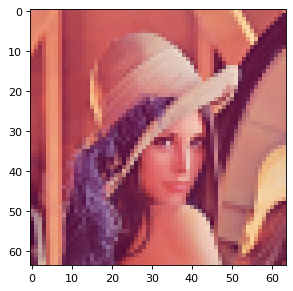

In [24]:
# 縮小した画像を表示する
dpi = 80
xpixels, ypixels = 256, 256 # 原寸表示だとmatplotlibが縮小したのか区別しにくいので拡大表示する

figsize = ypixels / dpi, xpixels / dpi

fig = plt.figure(figsize=figsize, dpi=dpi)
ax = fig.add_axes([0, 0, 1, 1])

ax.imshow(im_small)
plt.show()

In [25]:
# p202 例 2.9.7
D = {'radio', 'sensor', 'memory', 'CPU'}
v0 = Vec(D, {'radio': 0.1, 'CPU': 0.3})
v1 = Vec(D, {'sensor': 0.2, 'CPU': 0.4})
v2 = Vec(D, {'memory': 0.3, 'CPU': 0.1})
v3 = Vec(D, {'memory': 0.5, 'CPU': 0.4})
v4 = Vec(D, {'radio': 0.2, 'CPU': 0.5})

b = Vec({0, 1, 2, 3, 4}, {0: 140, 1: 170, 2: 60, 3: 170, 4: 250})
A = rowdict2mat([v0, v1, v2, v3, v4])
A

Mat(({0, 1, 2, 3, 4}, {'sensor', 'memory', 'radio', 'CPU'}), {(0, 'sensor'): 0, (0, 'memory'): 0, (0, 'radio'): 0.1, (0, 'CPU'): 0.3, (1, 'sensor'): 0.2, (1, 'memory'): 0, (1, 'radio'): 0, (1, 'CPU'): 0.4, (2, 'sensor'): 0, (2, 'memory'): 0.3, (2, 'radio'): 0, (2, 'CPU'): 0.1, (3, 'sensor'): 0, (3, 'memory'): 0.5, (3, 'radio'): 0, (3, 'CPU'): 0.4, (4, 'sensor'): 0, (4, 'memory'): 0, (4, 'radio'): 0.2, (4, 'CPU'): 0.5})

In [26]:
rate = solve(A, b)
rate

Vec({'sensor', 'memory', 'radio', 'CPU'},{'sensor': 250.0000000000009, 'radio': 500.0000000000011, 'memory': 100.00000000000034, 'CPU': 299.99999999999955})

In [27]:
r = b - A*rate
r*r < sys.float_info.epsilon

True

In [28]:
# p206 問題 4.7.3
def l2v(L):
    D = set(range(len(L)))
    return Vec(D, {k: v for k, v in enumerate(L)})
            
# 1.
A = rowdict2mat([l2v([1, 0, 1])])
v = l2v([1, 0, -1])
A*v

Vec({0},{0: 0})

In [29]:
# 2.
A = rowdict2mat([l2v([2, 0, 0]), l2v([0, 1, 1])])
v = l2v([0, 1, -1])
A*v

Vec({0, 1},{0: 0, 1: 0})

In [30]:
# 3.
A = rowdict2mat([l2v([1, 0, 0]), l2v([0, 0, 0]), l2v([0, 0, 1])])
v = l2v([0, 1, 0])
A*v

Vec({0, 1, 2},{0: 0, 1: 0, 2: 0})

In [31]:
# ハミングコード
H = rowdict2mat([
    l2v([0,0,0,one,one,one,one]),
    l2v([0,one,one,0,0,one,one]),
    l2v([one,0,one,0,one,0,one])])
e = l2v([0,0,one,0,0,0,0])
H*e

Vec({0, 1, 2},{0: 0, 1: one, 2: one})

In [32]:
# p210 クイズ 4.7.10
e1 = l2v([0,0,one,one,0,0,0])
e2 = l2v([0,one,0,0,one,0,0])
H*e1 == H*e2

True

In [33]:
# p221 クイズ 4.10.21
def diag(D, entries):
    return Mat((D, D), {(d, d): entries[d] for d in D})

diag({0, 1, 2}, {0: 'a', 1:'b', 2:'c'})

Mat(({0, 1, 2}, {0, 1, 2}), {(0, 0): 'a', (1, 1): 'b', (2, 2): 'c'})

In [34]:
D = {1, 2, 3, 4}
A = Mat((D, D), {
    (1,2): 1, (1,4): 1,
    (2,1): 1, (2,3): 2, (2,4): 1,
    (3,2): 2,
    (4,1):1, (4,2):1
})

print(A)
print(A*A)
print(A*A*A)


       1 2 3 4
     ---------
 1  |  0 1 0 1
 2  |  1 0 2 1
 3  |  0 2 0 0
 4  |  1 1 0 0


       1 2 3 4
     ---------
 1  |  2 1 2 1
 2  |  1 6 0 1
 3  |  2 0 4 2
 4  |  1 1 2 2


       1  2  3 4
     -----------
 1  |  2  7  2 3
 2  |  7  2 12 7
 3  |  2 12  0 2
 4  |  3  7  2 2



In [36]:
# p244 課題 4.14.1
from GF2 import one
from matutil import listlist2mat
from vecutil import list2vec

G = listlist2mat([[one,0,one,one],[one,one,0,one],[0,0,0,one],[one,one,one,0],[0,0,one,0],[0,one,0,0],[one,0,0,0]])
msg = list2vec([one,0,0,one])

print(G * msg)


 0 1   2   3 4 5   6
--------------------
 0 0 one one 0 0 one


In [37]:
# p244 課題 4.14.3
R = listlist2mat([[0, 0, 0, 0, 0, 0, one], [0, 0, 0, 0, 0, one, 0], [0, 0, 0, 0, one, 0, 0], [0, 0, one, 0, 0, 0, 0]])

print(R*(G*msg))
print(R*G)


   0 1 2   3
------------
 one 0 0 one

         0   1   2   3
     -----------------
 0  |  one   0   0   0
 1  |    0 one   0   0
 2  |    0   0 one   0
 3  |    0   0   0 one



In [38]:
# p245 課題 4.14.4
H = listlist2mat([[0, 0, 0, one, one, one, one], [0, one, one, 0, 0, one, one], [one, 0, one, 0, one, 0, one]])

print(H*G)


       0 1 2 3
     ---------
 0  |  0 0 0 0
 1  |  0 0 0 0
 2  |  0 0 0 0



In [53]:
# p245 課題 4.14.5
def find_error(syndrome):
    n = sum([2**i if syndrome[2 - i] == one else 0 for i in range(3)])
    return Vec(set(range(7)), {n-1: one} if n > 0 else dict())

from vecutil import list2vec

syndromes = [
    list2vec([0,0,one]),
    list2vec([0,one,0]),
    list2vec([0,one,one]),
    list2vec([one,0,0]),
    list2vec([one,0,one]),
    list2vec([one,one,0]),
    list2vec([one,one,one]),
    Vec({0,1,2}, {})
]
for s in syndromes:
    print(find_error(s))


   0 1 2 3 4 5 6
----------------
 one 0 0 0 0 0 0

 0   1 2 3 4 5 6
----------------
 0 one 0 0 0 0 0

 0 1   2 3 4 5 6
----------------
 0 0 one 0 0 0 0

 0 1 2   3 4 5 6
----------------
 0 0 0 one 0 0 0

 0 1 2 3   4 5 6
----------------
 0 0 0 0 one 0 0

 0 1 2 3 4   5 6
----------------
 0 0 0 0 0 one 0

 0 1 2 3 4 5   6
----------------
 0 0 0 0 0 0 one

 0 1 2 3 4 5 6
--------------
 0 0 0 0 0 0 0


In [60]:
# p245 課題 4.14.6
non_codeword = Vec({0, 1, 2, 3, 4, 5, 6}, {0: one, 1: 0, 2: one, 3: one, 4: 0, 5: one, 6: one})

error_vector = find_error(H * non_codeword)
code_word = non_codeword + error_vector
original = R * code_word

print(non_codeword)
print(error_vector)
print(code_word)
print(original)


   0 1   2   3 4   5   6
------------------------
 one 0 one one 0 one one

 0 1 2 3 4 5   6
----------------
 0 0 0 0 0 0 one

   0 1   2   3 4   5 6
----------------------
 one 0 one one 0 one 0

 0   1 2   3
------------
 0 one 0 one


In [92]:
# p245 課題 4.14.7
def find_error_matrix(S):
    return coldict2mat({col: find_error(s) for col, s in sorted(mat2coldict(S).items(), key=lambda p: p[0])})

S = listlist2mat([[0,one,one,one],[0,one,0,0],[0,0,0,one]])
print(S)

print(find_error_matrix(S))
find_error_matrix(S) == Mat(({0, 1, 2, 3, 4, 5, 6}, {0, 1, 2, 3}), {(1, 3): 0, (3, 0): 0, (2, 1): 0, (6, 2): 0, (5, 1): one, (0, 3): 0, (4, 0): 0, (1, 2): 0, (3, 3): 0, (6, 3): 0, (5, 0): 0, (2, 2): 0, (4, 1): 0, (1, 1): 0, (3, 2): one, (0, 0): 0, (6, 0): 0, (2, 3): 0, (4, 2): 0, (1, 0): 0, (5, 3): 0, (0, 1): 0, (6, 1): 0, (3, 1): 0, (2, 0): 0, (4, 3): one, (5, 2): 0, (0, 2): 0})


       0   1   2   3
     ---------------
 0  |  0 one one one
 1  |  0 one   0   0
 2  |  0   0   0 one


       0   1   2   3
     ---------------
 0  |  0   0   0   0
 1  |  0   0   0   0
 2  |  0   0   0   0
 3  |  0   0 one   0
 4  |  0   0   0 one
 5  |  0 one   0   0
 6  |  0   0   0   0



True

In [76]:
# p246 課題 4.14.8
s = ''.join([chr(i) for i in range(256)])
print(s)

from bitutil import str2bits, bits2str

bits2str(str2bits(s)) == s

 	
 !"#$%&'()*+,-./0123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[\]^_`abcdefghijklmnopqrstuvwxyz{|}~ ¡¢£¤¥¦§¨©ª«¬­®¯°±²³´µ¶·¸¹º»¼½¾¿ÀÁÂÃÄÅÆÇÈÉÊËÌÍÎÏÐÑÒÓÔÕÖ×ØÙÚÛÜÝÞßàáâãäåæçèéêëìíîïðñòóôõö÷øùúûüýþÿ


True

In [79]:
# p246 課題 4.14.9
from bitutil import bits2mat, mat2bits

print(bits2str(mat2bits(bits2mat(str2bits(s)))))

 	
 !"#$%&'()*+,-./0123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[\]^_`abcdefghijklmnopqrstuvwxyz{|}~ ¡¢£¤¥¦§¨©ª«¬­®¯°±²³´µ¶·¸¹º»¼½¾¿ÀÁÂÃÄÅÆÇÈÉÊËÌÍÎÏÐÑÒÓÔÕÖ×ØÙÚÛÜÝÞßàáâãäåæçèéêëìíîïðñòóôõö÷øùúûüýþÿ


In [84]:
# p247 課題 4.14.11
from bitutil import noise

s = "I'm trying to free your mind, Neo. But I can only show you the door. You're the one that has to walk through it."
P = bits2mat(str2bits(s))
E = noise(P, 0.02)

bits2str(mat2bits(P + E))

"A'm trying to fred your minf, Nmo. Cut I can only$sho÷`}oõ the door. You%re&the one that0has to vqlk throvgh it."

In [87]:
# p247 課題 4.14.12
C = G * P
bits2str(mat2bits(R * C))

"I'm trying to free your mind, Neo. But I can only show you the door. You're the one that has to walk through it."

In [90]:
# p247 課題 4.14.13
CTILDE = C + noise(C, 0.02)
bits2str(mat2bits(R * CTILDE))

'A\'m trying to free$youb mind, Neo. Hut I can onL{ show {ou the door. You\'re the"one thát has to walk through it.'

In [95]:
# p248 課題 4.14.15
def correct(A):
    return A + find_error_matrix(H * A)

# コードワードに2bit以上のノイズが乗ると正しく復元できない
bits2str(mat2bits(R * correct(CTILDE)))

"I'm trying to free your mind, Neo. Lut I can onLy show you the door. You're the one that has to walk through it."

In [143]:
# p248 課題 4.14.16
E = noise(C, 0.05)
CTILDE = C + E
decoded = bits2str(mat2bits(R * correct(CTILDE)))

print(bits2str(mat2bits(R * CTILDE)))
print(decoded)
print(decoded == s)
print([list(e.f.values()).count(one) for e in mat2coldict(E).values()])

I'm 4ryi~g"tO fruåyowr m)nä,0Nuo. tt"Y can onY show you(tÈe dkor. Yoe'òe 4he ze that hes vk!waIk thrnqoh i|.
I'm trying to free ymur mind, Neo. But I can ony show you te dkor. Yoe're 4he o>e that haS to waik through it.
False
[0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 2, 0, 1, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 2, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
